In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#reading the dataset from csv file
def read_data(file):
    data = pd.read_csv(file, header=None , index_col=None)
    return data
data = read_data('/content/drive/My Drive/MLP_Assignment/bank.csv')
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [0]:
#shuffling and splitting of the dataset
def split_data(data):
    df = pd.DataFrame(data)
    #shuffle the dataset
    df = df.sample(frac=1)
    #split the dataset
    split = np.random.rand(len(df)) < 0.7
    train = np.asmatrix(df[split], dtype = 'float64')
    test = np.asmatrix(df[~split], dtype = 'float64')
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = test[:, :-1]
    y_test = test[:,-1]
    return X_train,y_train,X_test,y_test
X_train,y_train,X_test,y_test = split_data(data)

In [0]:
#initializing params
alpha = 0.7
epoch = 100
W = np.zeros(X_train.shape[1]+1)

In [0]:
#activation function
def activation(z):
        if z>=0:
            return 1
        else:
            return 0   

In [0]:
 #prediction function
 def predict(x):
    z = np.dot(x, W[1:]) + W[0]
    g = activation(z)
    return g

epoch:0  weight:[ 17.5        -33.03470835 -33.03470835 -33.03470835 -33.03470835]  learning rate:0.7  Training Accuracy:94.35897435897435
epoch:1  weight:[ 32.9       -58.1459207 -58.1459207 -58.1459207 -58.1459207]  learning rate:0.7  Training Accuracy:95.07692307692308
epoch:2  weight:[ 46.2        -77.94287305 -77.94287305 -77.94287305 -77.94287305]  learning rate:0.7  Training Accuracy:95.38461538461539
epoch:3  weight:[ 58.8       -94.6757154 -94.6757154 -94.6757154 -94.6757154]  learning rate:0.7  Training Accuracy:95.48717948717949
epoch:4  weight:[  70.7        -110.11474775 -110.11474775 -110.11474775 -110.11474775]  learning rate:0.7  Training Accuracy:95.58974358974359
epoch:5  weight:[  82.6       -125.5537801 -125.5537801 -125.5537801 -125.5537801]  learning rate:0.7  Training Accuracy:95.58974358974359
epoch:6  weight:[  93.8        -141.48680245 -141.48680245 -141.48680245 -141.48680245]  learning rate:0.7  Training Accuracy:95.48717948717949
epoch:7  weight:[ 105.     

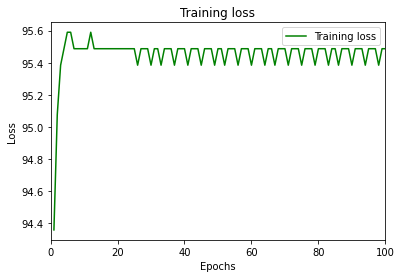

In [8]:
 #training to learn the weights
 def train(X_train, y_train):
        loss_train = []
        epochs = range(1,epoch+1)
        for i in range(epoch):
            correct = 0
            for x, y in zip(X_train, y_train):
                prediction = predict(x)
                y = np.array(y)[0][0]
                x = np.array(x)[0]
                error = y - prediction
                actual_value = int(y)
                if actual_value == prediction:
                  correct += 1
                W[1:] += alpha * error * x[0]
                W[0] += alpha * error
            training_accuracy =  correct/float(X_train.shape[0])*100.0      
            loss_train.append(training_accuracy)
            print("epoch:"+str(i)+"  weight:"+str(W)+"  learning rate:"+str(alpha)+"  Training Accuracy:"+str(training_accuracy))
        plt.plot(epochs, loss_train, 'g', label='Training loss')        
        plt.xlim(0,epoch)
        plt.title('Training loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

train(X_train, y_train)            

Predictions on test data:
X: [[ 1.581    0.86909 -2.3138   0.82412]] prediction: 0 Actual value:1
X: [[ 3.4776   8.811   -3.1886  -0.92285]] prediction: 0 Actual value:0
X: [[2.5367  2.599   2.0938  0.20085]] prediction: 0 Actual value:0
X: [[-1.4377  -1.432    2.1144   0.42067]] prediction: 1 Actual value:1
X: [[-0.93587 -5.1008   4.5367   1.3866 ]] prediction: 1 Actual value:1
X: [[ 1.7747  -6.4334   8.15    -0.89828]] prediction: 0 Actual value:0
X: [[-2.2153   11.9625    0.078538 -7.7853  ]] prediction: 0 Actual value:0
X: [[ 0.5195 -3.2633  3.0895 -0.9849]] prediction: 1 Actual value:0
X: [[ 4.1038  -4.8069   3.3491  -0.49225]] prediction: 0 Actual value:0
X: [[-4.8426  -4.9932  10.4052  -0.53104]] prediction: 1 Actual value:1
X: [[-0.10234  1.8189  -2.2169  -0.56725]] prediction: 1 Actual value:1
X: [[ 2.4486  -6.3175   7.9632   0.20602]] prediction: 0 Actual value:0
X: [[-0.69078 -0.50077 -0.35417  0.47498]] prediction: 1 Actual value:1
X: [[-0.36372  3.0439  -3.4816  -2.7836 ]]

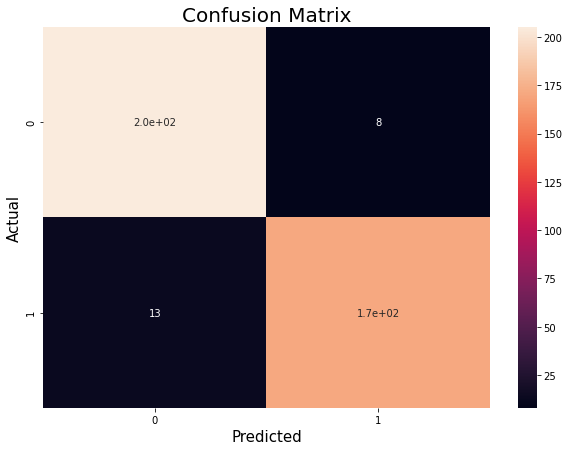

In [9]:
#Testset accuracy, Confusion Matrix and Accuracy metrics
def test(X_test, y_test):
    print("Predictions on test data:")
    correct = 0
    tp,fp,tn,fn = 0,0,0,0
    for x,y in zip(X_test,y_test):
        prediction = predict(x)
        actual_value = int(np.array(y)[0][0])
        print("X: "+str(x)+" prediction: "+str(prediction)+" Actual value:"+str(actual_value))
        if actual_value == prediction:
          correct += 1
        if actual_value == 0 and prediction == 0:
          tp += 1
        if actual_value == 1 and prediction ==1:
          tn += 1
        if actual_value == 0 and prediction ==1:
          fn += 1
        if actual_value == 1 and prediction == 0:
          fp += 1  
    test_accuracy =  correct/float(X_test.shape[0])*100.0
    print("Test Accuracy:"+str(test_accuracy))
    print()
    print("Accuracy metrics:")
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print("Accuracy: "+str(accuracy))
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print()    
    print("Confusion matrix:")
    cm = [[tp,fp],[fn,tn]]
    print(cm)
    print()
    df_cm = pd.DataFrame(cm, range(2), range(2))
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True)
    plt.title('Confusion Matrix', fontsize = 20) 
    plt.xlabel('Predicted', fontsize = 15) 
    plt.ylabel('Actual', fontsize = 15) 

plt.show()
test(X_test, y_test)
